# SDXL PixelWave Image Generation — Step-by-Step Notebook

This Jupyter notebook is designed for non-technical users. It allows you to generate images step by step using the PixelWave (SDXL) model without needing deep knowledge of diffusion models or machine learning.

## 1 Install dependencies

Run this cell once. It will install all required libraries.

In [1]:
!pip install torch diffusers transformers accelerate safetensors


[notice] A new release of pip is available: 23.2.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


## Import libraries and load the model

In this step:

- required libraries are imported

- the PixelWave model is loaded

- the sampler and memory settings are configured

In [2]:
import torch
from pathlib import Path
from diffusers import StableDiffusionXLPipeline, DPMSolverMultistepScheduler

# Path to the PixelWave SDXL model (.safetensors file)
# Укажите путь к файлу модели на вашем компьютере
MODEL_PATH = Path(
r"D:/stablediffusion/ComfyUI/models/diffusion_models/pixelwave_sdxl11.safetensors"
)


# Load SDXL pipeline from a single-file checkpoint
pipe = StableDiffusionXLPipeline.from_single_file(
MODEL_PATH,
torch_dtype=torch.float16,
use_safetensors=True,
variant="fp16",
)


# Use DPM++ 2M Karras–equivalent sampler
pipe.scheduler = DPMSolverMultistepScheduler.from_config(
pipe.scheduler.config,
use_karras_sigmas=True
)


# Move model to GPU
pipe = pipe.to("cuda")


# Enable memory optimizations (recommended for SDXL)
pipe.enable_attention_slicing()


print("Model loaded successfully")

d:\stablediffusion\ComfyUI\test_venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Loading pipeline components...: 100%|██████████| 7/7 [00:01<00:00,  6.36it/s]


Model loaded successfully


## Enter prompt and generation parameters

In this cell you can:

- change the text prompt

- optionally adjust image quality or style parameters

In [3]:
# Positive prompt (what you want to see in the image)
prompt = (
"anime style female character, detailed illustration, "
"soft lighting, expressive eyes, high quality"
)


# Negative prompt (what you want to avoid)
negative_prompt = (
"low quality, blurry, extra fingers, bad anatomy, "
"deformed hands, poorly drawn face"
)


# Generation parameters
steps = 30 # Number of diffusion steps (higher = slower, more detail)
cfg_scale = 7.0 # Prompt strength
width = 1024 # Image width
height = 1024 # Image height
seed = 42 # Set to None for random results

## Generate the image

After running this cell, the model will generate an image and display it below.

100%|██████████| 30/30 [00:23<00:00,  1.29it/s]
d:\stablediffusion\ComfyUI\test_venv\Lib\site-packages\diffusers\pipelines\stable_diffusion_xl\pipeline_stable_diffusion_xl.py:748: FutureWarning: `upcast_vae` is deprecated and will be removed in version 1.0.0. `upcast_vae` is deprecated. Please use `pipe.vae.to(torch.float32)`. For more details, please refer to: https://github.com/huggingface/diffusers/pull/12619#issue-3606633695.
  deprecate(


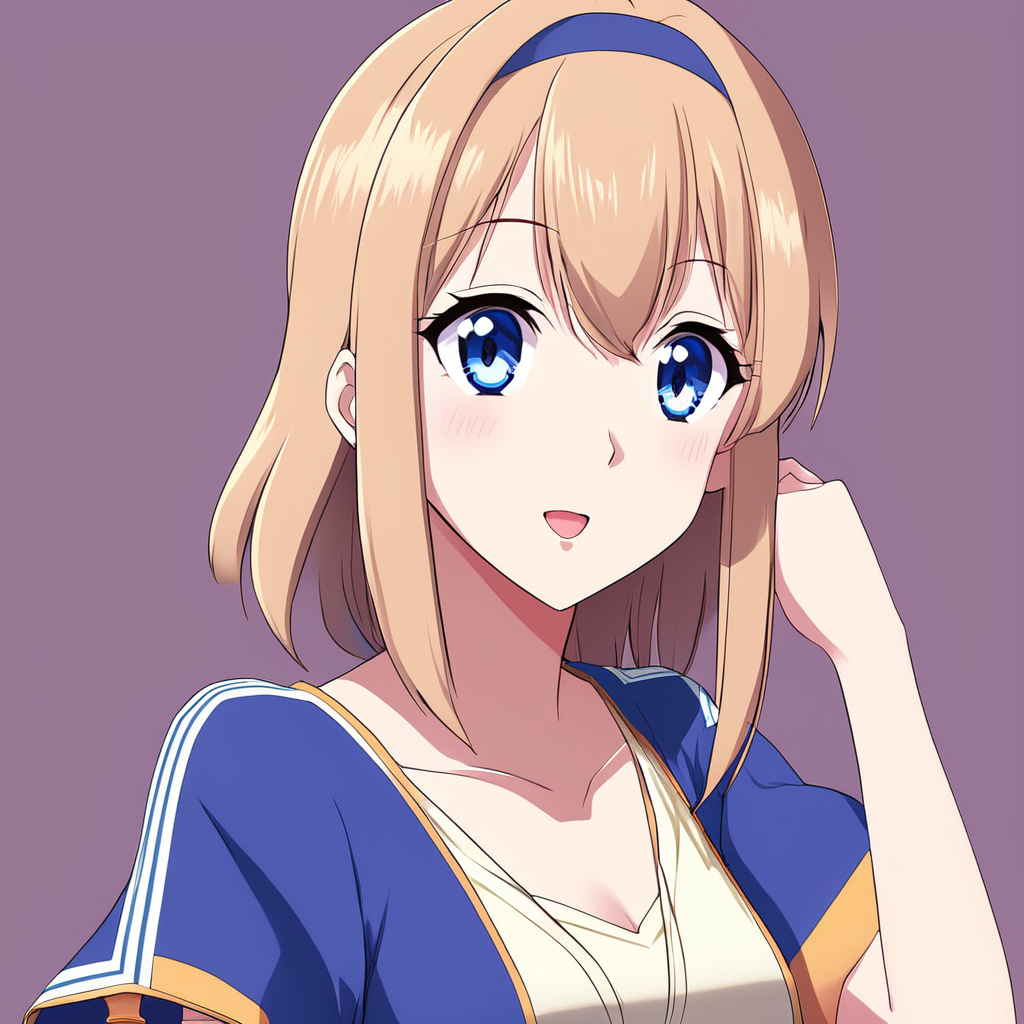

In [5]:
# Create a random generator for reproducibility (optional)
generator = None
if seed is not None:
    generator = torch.Generator(device="cuda").manual_seed(seed)


# Run image generation
result = pipe(
prompt=prompt,
negative_prompt=negative_prompt,
num_inference_steps=steps,
guidance_scale=cfg_scale,
width=width,
height=height,
generator=generator,
)


image = result.images[0]
image

## Save the result

This cell saves the generated image as ```result.png``` in the current directory.

In [6]:
image.save("result1.png")
print("Image saved as result1.png")

Image saved as result1.png
